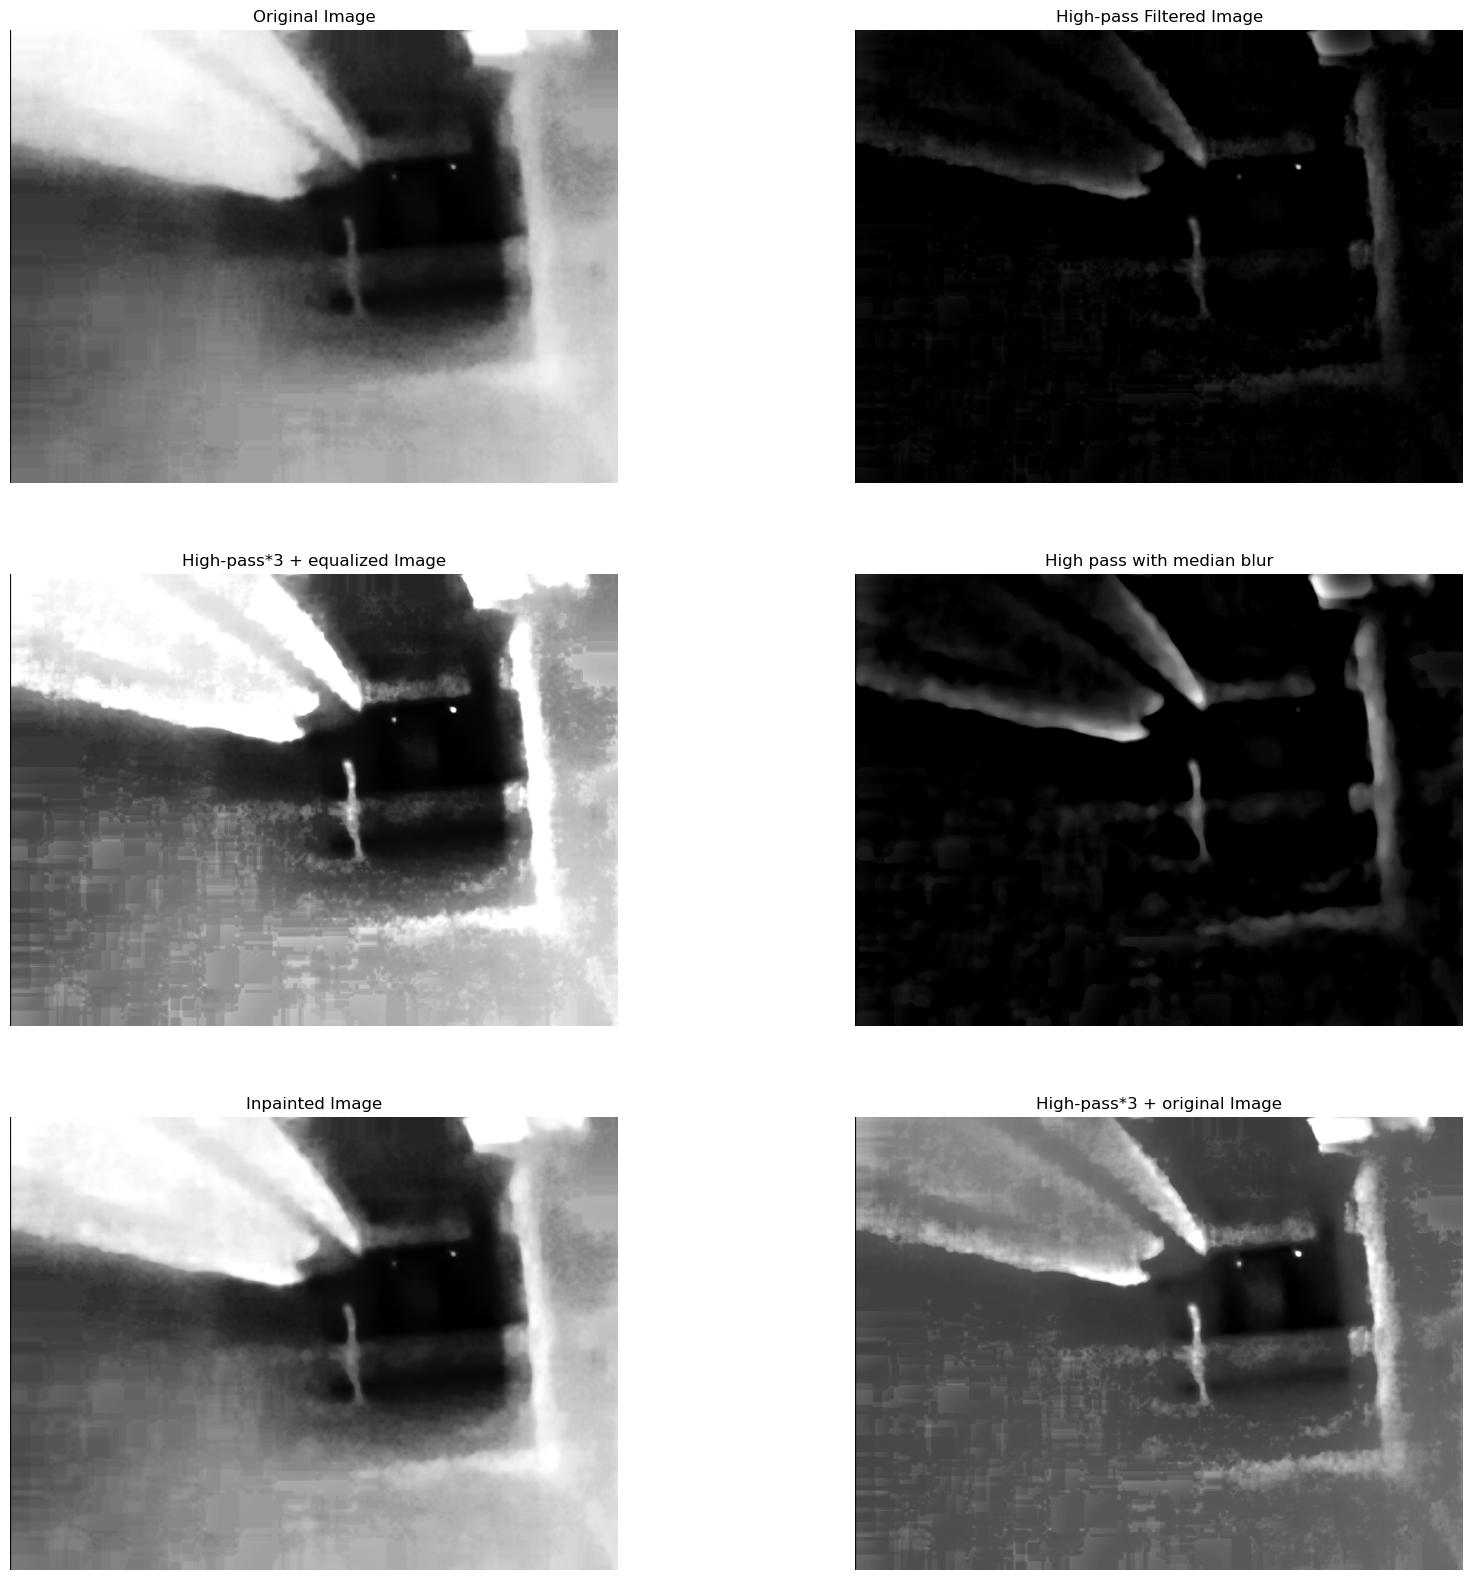

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image using OpenCV
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
equalized = cv2.equalizeHist(image)

# Apply a Gaussian blur (low-pass filter)
low_pass_image = cv2.GaussianBlur(equalized, (299, 299), 0)

# Subtract the low-pass filtered image from the original to get the high-pass filtered image
high_pass_image = cv2.subtract(equalized, low_pass_image)

# end = cv2.add(equalized, otsu_thresh_img)
# end = cv2.add(end, otsu_thresh_img)
# end = cv2.add(end, otsu_thresh_img)
# end = cv2.add(end, high_pass_image)

# Step 2: Noise Removal (Denoising)
# denoised = cv2.GaussianBlur(end, (25, 25), 0)  # Gaussian Blur for smoothing
# denoised_img = cv2.medianBlur(high_pass_image, 15)
# new = cv2.equalizeHist(end)
# Normalize the image to the range [0, 1]
# normalized_image_01 = cv2.normalize(high_pass_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Apply adaptive thresholding
# adaptive_thresh_img = cv2.adaptiveThreshold(high_pass_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
#                                            cv2.THRESH_BINARY, 11, 2)

# _, otsu_thresh_img = cv2.threshold(high_pass_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply global thresholding (e.g., threshold value = 127)
_, thresholded_img = cv2.threshold(high_pass_image, 30, 40, cv2.THRESH_BINARY)

end = cv2.add(equalized, high_pass_image)
end = cv2.add(end, high_pass_image)
end = cv2.add(end, high_pass_image)

end2 = cv2.add(image, high_pass_image)
end2 = cv2.add(end2, high_pass_image)
end2 = cv2.add(end2, high_pass_image) 


high = cv2.medianBlur(high_pass_image, 25)
high2 = cv2.add(high_pass_image, high_pass_image)
high3 = cv2.add(high, high_pass_image)

final = cv2.GaussianBlur(end, (45, 45), 0)
final2 = cv2.add(equalized, high)

_, mask = cv2.threshold(image, 20, 255, cv2.THRESH_BINARY)
inpainted_image = cv2.inpaint(end, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

denoised_image = cv2.medianBlur(end, 25)

# Display the original, low-pass, and high-pass filtered images using Matplotlib
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

# Original Image
axes[0][0].imshow(equalized, cmap='gray')
axes[0][0].set_title('Original Image')
axes[0][0].axis('off')

# Low-pass filtered Image
# High-pass filtered Image
axes[0][1].imshow(high_pass_image, cmap='gray')
axes[0][1].set_title('High-pass Filtered Image')
axes[0][1].axis('off')

# High-pass + Image
axes[1][0].imshow(end, cmap='gray')
axes[1][0].set_title('High-pass*3 + equalized Image')
axes[1][0].axis('off')

axes[1][1].imshow(high, cmap='gray')
axes[1][1].set_title('High pass with median blur')
axes[1][1].axis('off')

axes[2][0].imshow(final2, cmap='gray')
axes[2][0].set_title('Inpainted Image')
axes[2][0].axis('off')

axes[2][1].imshow(end2, cmap='gray')
axes[2][1].set_title('High-pass*3 + original Image')
axes[2][1].axis('off')

plt.show()


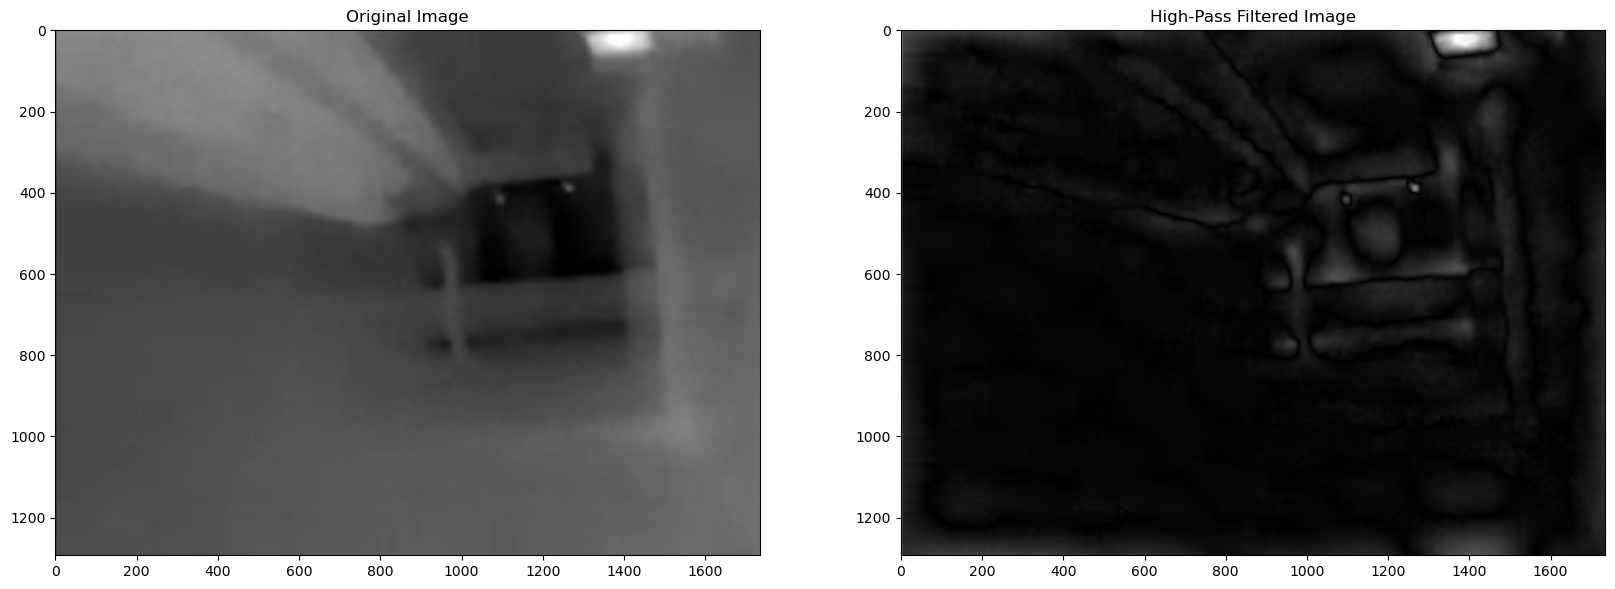

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
equalized = cv2.equalizeHist(image)

# Apply 2D FFT
f_transform = np.fft.fft2(image)

# Shift low frequencies to the center
f_shift = np.fft.fftshift(f_transform)

# Create a High-Pass Filter (HPF)
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2  # Center of image

# Create a mask with a small black region in the center (removes low frequencies)
mask = np.ones((rows, cols), np.uint8)
r = 5  # Radius of low-frequency area to remove
mask[crow-r:crow+r, ccol-r:ccol+r] = 0  # Set the center region to 0

# Apply mask to frequency domain
f_shift_filtered = f_shift * mask

# Inverse FFT to get back to spatial domain
f_ishift = np.fft.ifftshift(f_shift_filtered)
image_filtered = np.fft.ifft2(f_ishift)
image_filtered = np.abs(image_filtered)  # Take magnitude

# Display results
plt.figure(figsize=(20,10))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1,2,2), plt.imshow(image_filtered, cmap='gray'), plt.title("High-Pass Filtered Image")
plt.show()


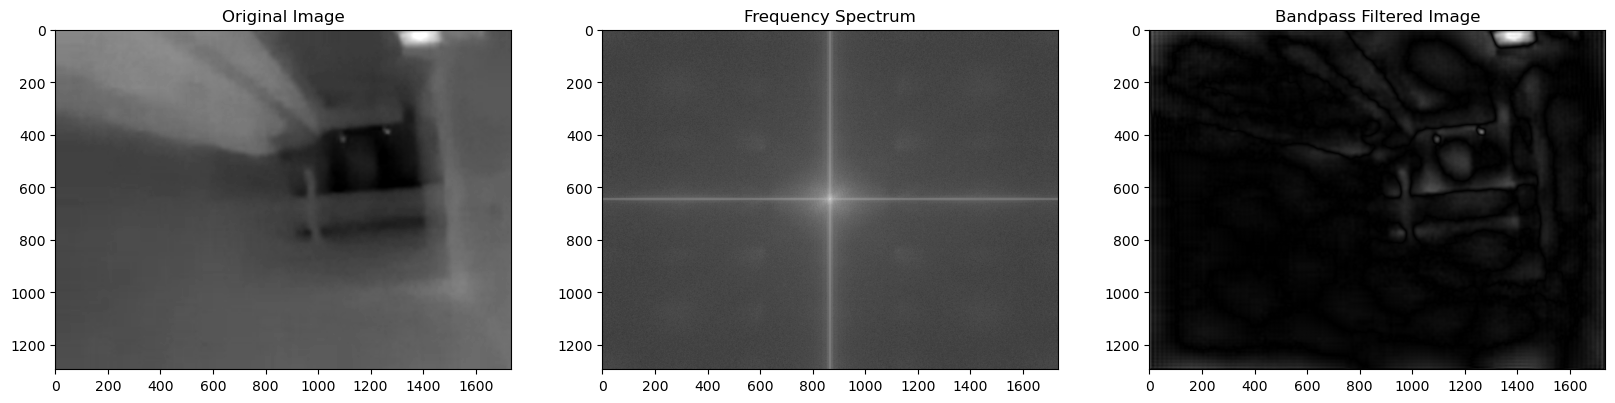

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Apply 2D FFT
f_transform = np.fft.fft2(image)

# Shift low frequencies to the center
f_shift = np.fft.fftshift(f_transform)

# Create a Bandpass Filter (BPF)
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2  # Center of image

# Define the bandpass range (keep frequencies between r_low and r_high)
r_low = 5  # Low cutoff (removes very smooth areas)
r_high =100  # High cutoff (removes noise/sharp details)

# Create a mask with a ring shape
mask = np.zeros((rows, cols), np.uint8)
for i in range(rows):
    for j in range(cols):
        d = np.sqrt((i - crow)**2 + (j - ccol)**2)  # Distance from center
        if r_low < d < r_high:
            mask[i, j] = 1  # Keep mid-frequency components

# Apply mask to frequency domain
f_shift_filtered = f_shift * mask

# Inverse FFT to get back to spatial domain
f_ishift = np.fft.ifftshift(f_shift_filtered)
image_filtered = np.fft.ifft2(f_ishift)
image_filtered = np.abs(image_filtered)  # Take magnitude

# Display results
plt.figure(figsize=(20,10))
plt.subplot(1,3,1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1,3,2), plt.imshow(np.log(np.abs(f_shift) + 1), cmap='gray'), plt.title("Frequency Spectrum")
plt.subplot(1,3,3), plt.imshow(image_filtered, cmap='gray'), plt.title("Bandpass Filtered Image")
plt.show()


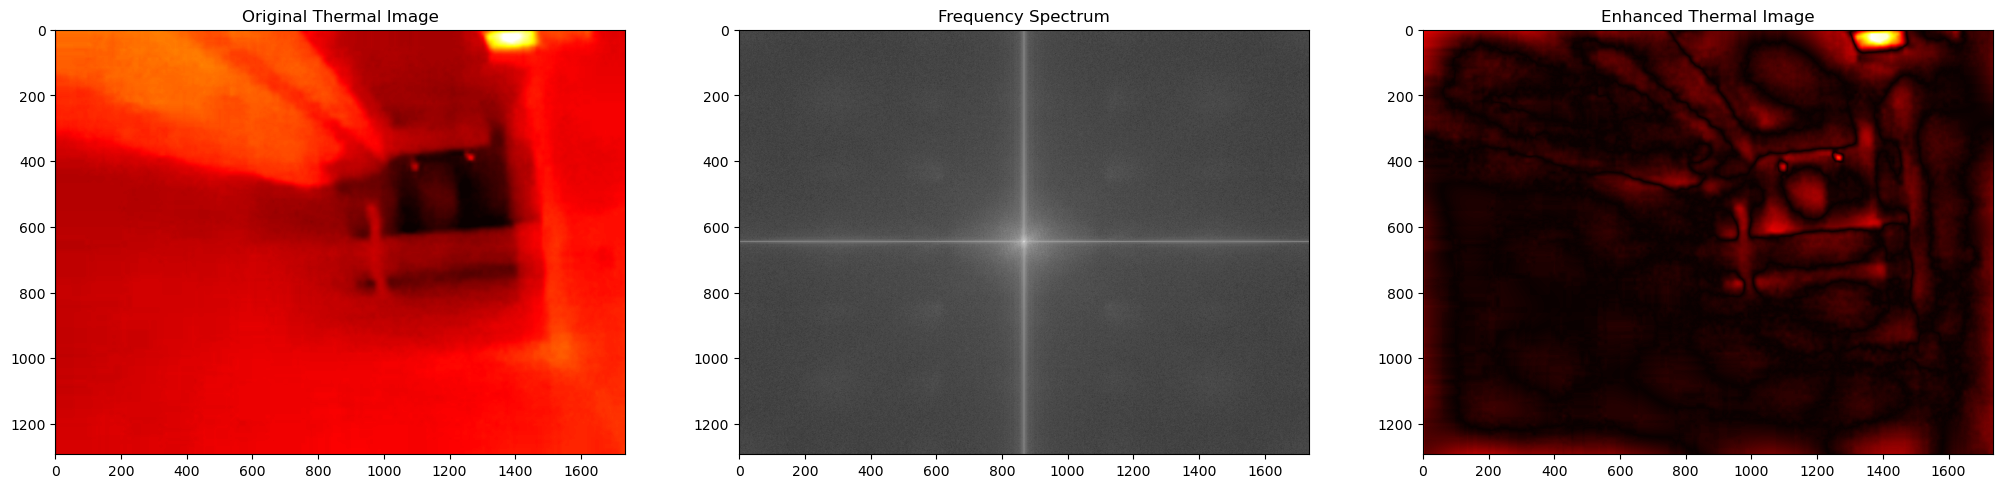

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load thermal image (grayscale)
image = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)

# Apply FFT (convert to frequency domain)
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)  # Shift low frequencies to center

# Create a High-Pass Filter (HPF)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of image
r = 5  # Cutoff radius (smaller values = more high frequencies preserved)

# Create a mask with a black center (removes low frequencies)
mask = np.ones((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), r, 0, -1)  # Circular low-frequency block

# Apply mask to the frequency domain
f_shift_filtered = f_shift * mask

# Convert back to spatial domain
f_ishift = np.fft.ifftshift(f_shift_filtered)
image_filtered = np.fft.ifft2(f_ishift)
image_filtered = np.abs(image_filtered)

# Normalize for better visualization
image_filtered = cv2.normalize(image_filtered, None, 0, 255, cv2.NORM_MINMAX)

# Display results
plt.figure(figsize=(25,15))
plt.subplot(1,3,1), plt.imshow(image, cmap='hot'), plt.title("Original Thermal Image")
plt.subplot(1,3,2), plt.imshow(np.log(np.abs(f_shift) + 1), cmap='gray'), plt.title("Frequency Spectrum")
plt.subplot(1,3,3), plt.imshow(image_filtered, cmap='hot'), plt.title("Enhanced Thermal Image")
plt.show()


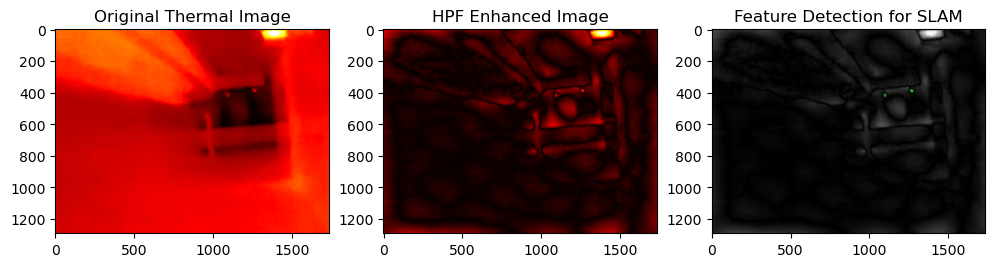

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load thermal image (grayscale)
image = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)

# Apply FFT (convert to frequency domain)
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)

# Create a High-Pass Filter (HPF)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
r = 5  # Cutoff radius for HPF

mask = np.ones((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), r, 0, -1)  # Block low frequencies

# Apply HPF mask
f_shift_filtered = f_shift * mask
f_ishift = np.fft.ifftshift(f_shift_filtered)
image_filtered = np.fft.ifft2(f_ishift)
image_filtered = np.abs(image_filtered)

# Normalize for better visualization
image_filtered = cv2.normalize(image_filtered, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8 for feature detection
image_filtered = np.uint8(image_filtered)

# Apply ORB Feature Detector for SLAM
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(image_filtered, None)

# Draw keypoints
output_img = cv2.drawKeypoints(image_filtered, keypoints, None, color=(0,255,0))

# Display images
plt.figure(figsize=(12,5))
plt.subplot(1,3,1), plt.imshow(image, cmap='hot'), plt.title("Original Thermal Image")
plt.subplot(1,3,2), plt.imshow(image_filtered, cmap='hot'), plt.title("HPF Enhanced Image")
plt.subplot(1,3,3), plt.imshow(output_img), plt.title("Feature Detection for SLAM")
plt.show()


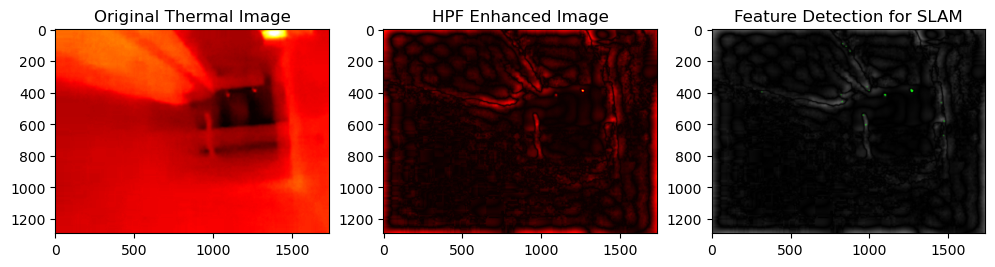

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load thermal image (grayscale)
image = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)

# Enhance contrast using histogram equalization
image_eq = cv2.equalizeHist(image)

# Apply FFT (convert to frequency domain)
f_transform = np.fft.fft2(image_eq)
f_shift = np.fft.fftshift(f_transform)

# Create a High-Pass Filter (HPF)
rows, cols = image_eq.shape
crow, ccol = rows // 2, cols // 2
r = 10  # Cutoff radius for HPF (tune this value)

mask = np.ones((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), r, 0, -1)  # Block low frequencies

# Apply HPF mask
f_shift_filtered = f_shift * mask
f_ishift = np.fft.ifftshift(f_shift_filtered)
image_filtered = np.fft.ifft2(f_ishift)
image_filtered = np.abs(image_filtered)

# Normalize for better visualization
image_filtered = cv2.normalize(image_filtered, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8 for feature detection
image_filtered = np.uint8(image_filtered)

# Apply ORB Feature Detector for SLAM
orb = cv2.ORB_create(nfeatures=1005000)  # Increase the number of features detected
keypoints, descriptors = orb.detectAndCompute(image_filtered, None)

# Draw keypoints
output_img = cv2.drawKeypoints(image_filtered, keypoints, None, color=(0,255,0))

# Display images
plt.figure(figsize=(12,5))
plt.subplot(1,3,1), plt.imshow(image, cmap='hot'), plt.title("Original Thermal Image")
plt.subplot(1,3,2), plt.imshow(image_filtered, cmap='hot'), plt.title("HPF Enhanced Image")
plt.subplot(1,3,3), plt.imshow(output_img), plt.title("Feature Detection for SLAM")
plt.show()
